# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

Nama : Malvin Subahri 

Batch : FTDS - 012

Dataset : WA_Fn-UseC_-Telco-Customer-Churn.csv

Objective : Membuat model deep learning dengan menggunakan ANN

Problem Statement : Membuat model deep learning dengan menggunakan ANN

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [11]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow import keras
import pickle
import warnings
warnings.filterwarnings ('ignore')
%matplotlib inline

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [13]:
pd.set_option ("display.max.column", None)
data = pd.read_csv ('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
# Check Dataset

data.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tidak ditemukan missing values pada dataset

In [15]:
# Duplicate Dataset

data_copy = data.copy ()

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Info About Dataset

customerID: Customer ID

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Whether the customer churned or not (Yes or No)

In [16]:
data.describe ()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Rata - rata tenure adalah 32 bulan dengan nilai min 0 dan nilai max 72 bulan

Rata - rata MonthlyCharges adalah 64 dengan nilai min 18.25 dan nilai max 118

In [17]:
data['TotalCharges'].describe ()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

Kolom TotalCharges merupakan data type object sehingga tidak bisa dilakukan fungsi agregasi, perhitungan TotalCharges = tenure * MonthlyCharges

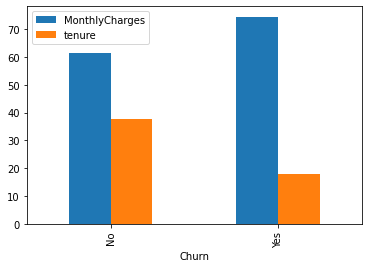

In [18]:
data.groupby (by=['Churn'])[['MonthlyCharges','tenure']].mean ().plot(kind='bar')

Jika dilihat dari grafik, rata - rata MonthlyCharges pelanggan yang churn lebih besar, mungkin pelanggan yang churn dikarenakan tingginya MonthlyCharges 

rata - rata pelanggan yang churn memiliki tenure lebih rendah, dapat diasumsikan mungkin semakin tinggi tenure maka kemungkinan pelanggan yang churn akan semakin kecil


Text(0.5, 1.0, 'tenure vs Churn')

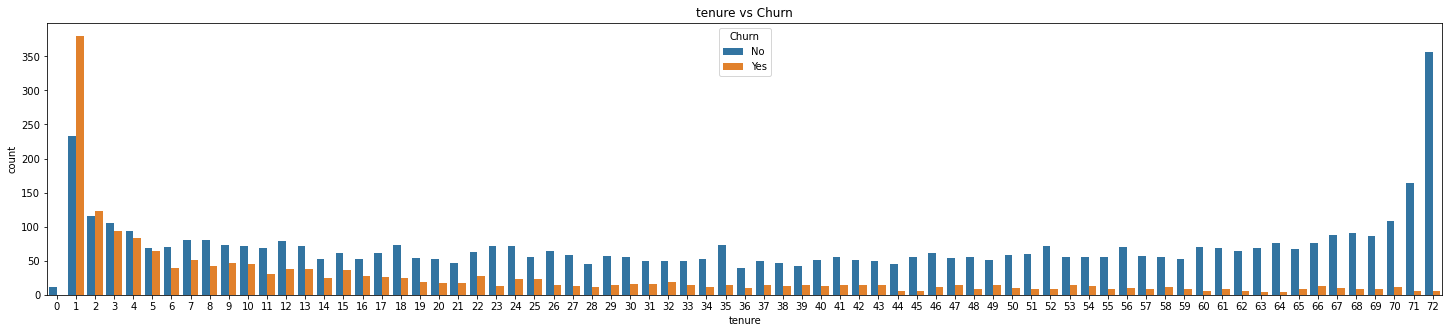

In [19]:
plt.figure (figsize=(25,5))
sns.countplot (data=data, x='tenure', hue='Churn')
plt.title ('tenure vs Churn')

Ternyata jika diplot ke dalam grafik, semakin tinggi tenure maka kemungkinan pelanggan yang churn akan semakin kecil

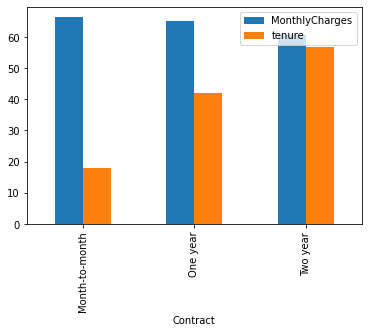

In [20]:
data.groupby (by=['Contract'])[['MonthlyCharges','tenure']].mean ().plot(kind='bar')

Semakin lama suatu kontrak, maka semakin rendah MonthlyCharges

Semakin lama suatu kontrak, maka semakin tinggi tenure

In [21]:
data.groupby (by=['InternetService'])[['MonthlyCharges','tenure']].mean ()

,MonthlyCharges,tenure
InternetService,,
DSL,58.102169,32.821561
Fiber optic,91.500129,32.917959
No,21.079194,30.547182


Berdasarkan grafik, InternetService yang menggunakan Fiber Optic memiliki MonthlyCharges paling tinggi diikuti dengan DSL kemudian tanpa InternetService

Dari sini kita bisa berasumsi bahwa Fiber Optic lebih bagus daripada DSL karena harga MonthlyCharges yang lebih tinggi

Text(0.5, 1.0, 'InternetService vs Churn')

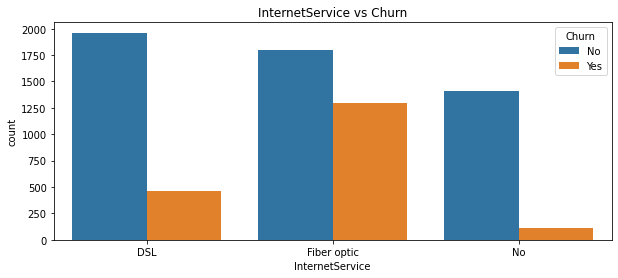

In [22]:
plt.figure (figsize=(10,4))
sns.countplot (data=data, x='InternetService', hue='Churn')
plt.title ('InternetService vs Churn')

Jika dilihat dari grafik, paling banyak pelanggan yang Churn dengan InternetServic Fiber Optic, mungkin ini dikarenakan InternetService Fiber Optic memiliki MonthlyCharges yang tinggi

In [23]:
data[(data['PhoneService'] == 'Yes') & 
     (data['OnlineSecurity'] == 'Yes') &
     (data['OnlineBackup'] == 'Yes') &
     (data['DeviceProtection'] == 'Yes') &
     (data['TechSupport'] == 'Yes') &
     (data['StreamingTV'] == 'Yes') &
     (data['StreamingMovies'] == 'Yes') &
     (data['InternetService'] == 'Fiber optic') 
][['MonthlyCharges']].describe()

,MonthlyCharges
count,141.000000
mean,114.311702
std,2.456156
min,106.300000
25%,113.250000
50%,114.750000
75%,115.850000
max,118.750000


Jika kita ingin mempunyai semua fitur dengan InternetService terbaik, maka minimal MonthlyCharges yang harus dibayarkan adalah sebesar 106.3

In [24]:
data.groupby (by=['SeniorCitizen'])[['MonthlyCharges']].describe ()

MonthlyCharges                                             \
                       count       mean        std    min    25%    50%   
SeniorCitizen                                                             
0                     5901.0  61.847441  30.316041  18.25  25.60  65.80   
1                     1142.0  79.820359  23.764027  18.95  70.15  84.85   

                               
                  75%     max  
SeniorCitizen                  
0              86.700  118.75  
1              98.075  117.45

Jika pelanggan merupakan SeniorCitizen, rata - rata MonthlyCharges cenderung lebih tinggi




In [25]:
data.groupby (by=['Partner','Dependents'])[['MonthlyCharges']].mean ()

MonthlyCharges
Partner Dependents                
No      No               62.983735
        Yes              52.507202
Yes     No               74.977737
        Yes              60.970069

Pelanggan yang mempunyai Partner cenderung memiliki rata- rata MonthlyCharges yang lebih tinggi

Pelanggan yang mempunyai Dependents cenderung memiliki rata- rata MonthlyCharges yang lebih rendah


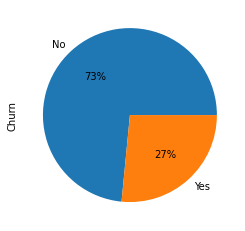

In [26]:
# Mencari Tahu Apakah Data Imbalance Atau Tidak

data['Churn'].value_counts ().plot (kind = 'pie', autopct='%1.0f%%')

Jika dilihat dari grafik, dapat diketahui bahwa dataset kita Imbalance karena perbandingan data yang No >2.5x dari data Yes dengan perbandingan 73% : 27%



# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.



## Get Data For Model Inference

In [27]:
# Get Data For Model Inference

data_inf = data.sample (10, random_state = 21)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6091,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
745,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
5130,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
5616,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
6647,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
6924,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6813,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes
1710,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
1658,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.8,Yes
3614,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No


In [28]:
# Remove Inference - Set from Dataset

data_train_test = data.drop (data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [29]:
# Reset Index

data_train_test.reset_index (drop = True, inplace = True)
data_inf.reset_index (drop = True, inplace = True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
3,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
4,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
5,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes
7,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
8,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.8,Yes
9,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No


## Feature Selection

In [30]:
# Display data_train_test

data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7028,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7029,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7030,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7031,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Berdasarkan hasil EDA dan personal judgement, kolom `SeniorCitizen, Partner, Dependents, tenure, PhoneService, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, MonthlyCharges` memiliki pengaruh terhadap `Churn` oleh karena itu kita memilih kolom tersebut ke dalam Feature Selection

## Splitting Dataset

In [31]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 
                     'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges']]
y = data_train_test[['Churn']]

In [32]:
# Split Between Train-Set and Test-Set

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

print('Train Size : ', X_train_full.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5626, 14)
Test Size :  (1407, 14)


In [33]:
# Split Between X_train and X_valid

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size = 0.2, random_state=42)

print('Train Size : ', X_train.shape)
print('Test Size : ', X_valid.shape)

Train Size :  (4500, 14)
Test Size :  (1126, 14)


## Handling Outliers 

In [34]:
print ('Skewness : ', X_train['SeniorCitizen'].skew ())
print ('Skewness : ', X_train['tenure'].skew ())
print ('Skewness : ', X_train['MonthlyCharges'].skew ())

Skewness :  1.8645244494694966
Skewness :  0.24810792416349817
Skewness :  -0.20808631303817393



Jika dilihat dari skewnessnya, kolom tenure & MonthlyCharges distribusi datanya adalah distribusi normal karena skewnessnya berada di rentang -0.5 - 0.5

Sedangkan kolom `SeniorCitizen` distribusi datanya adalah skew karena skewnessnya > 0.5

Jika dilihat SeniorCitizen merupakan data categorical maka dari itu kita tidak lakukan handling outliers

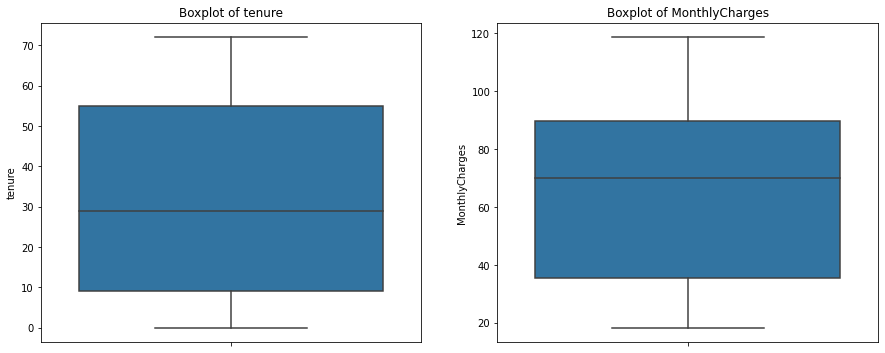

In [35]:
# Check Outliers With Boxplot

plt.figure(figsize = (15, 20))

plt.subplot(3, 2, 1)
sns.boxplot(y = X_train['tenure'])
plt.title('Boxplot of tenure')

plt.subplot(3, 2, 2)
sns.boxplot(y = X_train['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')

plt.show ()

Tidak ditemukan adanya outliers

## Handling Missing Values

In [36]:
# Check Missing Values In X_train

X_train.isnull ().sum ()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
dtype: int64

In [37]:
# Check Missing Values In X_test

X_test.isnull ().sum ()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
dtype: int64

In [38]:
# Check Missing Values In X_valid

X_valid.isnull ().sum ()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
dtype: int64

In [39]:
# Check Missing Values In y_train

y_train.isnull ().sum ()

Churn    0
dtype: int64

In [40]:
# Check Missing Values In y_test

y_test.isnull ().sum ()

Churn    0
dtype: int64

In [41]:
# Check Missing Values In y_valid

y_valid.isnull ().sum ()

Churn    0
dtype: int64

## Split between Numerical Columns And Categorical Columns

In [42]:
# Get Numerical Columns And Categorical Columns

num_columns= X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns= X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns :  ['Partner', 'Dependents', 'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract']


In [43]:
# Split Train-Set and Test-Set and Valid-Set based on Column Type

X_train_num_skew = X_train[['SeniorCitizen']]
X_train_num_normal = X_train[['tenure', 'MonthlyCharges']]
X_train_cat_nom = X_train[['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
X_train_cat_ord = X_train[['InternetService', 'Contract']]

X_test_num_skew = X_test[['SeniorCitizen']]
X_test_num_normal = X_test[['tenure', 'MonthlyCharges']]
X_test_cat_nom = X_test[['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
X_test_cat_ord = X_test[['InternetService', 'Contract']]

X_valid_num_skew = X_valid[['SeniorCitizen']]
X_valid_num_normal = X_valid[['tenure', 'MonthlyCharges']]
X_valid_cat_nom = X_valid[['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
X_valid_cat_ord = X_valid[['InternetService', 'Contract']]

## Feature Scaling

Karena kolom `SeniorCItizen` merupakan data yang terdistribusi secara skew, maka untuk Feature Scaling kita menggunakan `MinMaxScaler`

In [44]:
# Feature Scaling Using StandardScaler

scaler_mms = MinMaxScaler()
scaler_mms.fit(X_train_num_skew)

X_train_scaled_skew = scaler_mms.transform(X_train_num_skew)
X_test_scaled_skew = scaler_mms.transform(X_test_num_skew)
X_valid_scaled_skew = scaler_mms.transform(X_valid_num_skew)

Karena kolom `tenure, MonthlyCharges` merupakan data yang terdistribusi secara normal, maka untuk Feature Scaling kita menggunakan `StandardScaler`

In [45]:
# Feature Scaling Using StandardScaler

scaler_ss = StandardScaler()
scaler_ss.fit(X_train_num_normal)

X_train_scaled_normal = scaler_ss.transform(X_train_num_normal)
X_test_scaled_normal = scaler_ss.transform(X_test_num_normal)
X_valid_scaled_normal = scaler_ss.transform(X_valid_num_normal)

## Feature Encoding

Karena kolom `Partner, Dependents, PhoneService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies` merupakan data categorical nominal karena tidak memiliki keterurutan, maka untuk Feature Encoding kita menggunakan `OneHotEncoder`

In [46]:
# Feature Encoding using Ordinal Encoder

encoder_nom = OneHotEncoder()
                                     
encoder_nom.fit(X_train_cat_nom)

X_train_encoded_nom = encoder_nom.transform(X_train_cat_nom).toarray()
X_test_encoded_nom = encoder_nom.transform(X_test_cat_nom).toarray()
X_valid_encoded_nom = encoder_nom.transform(X_valid_cat_nom).toarray()


Karena kolom `InternetService, Contract` merupakan data categorical ordinal karena memiliki keterurutan, maka untuk Feature Encoding kita menggunakan `OrdinalEncoder`

In [47]:
encoder_ord = OrdinalEncoder(categories=[['No', 'DSL', 'Fiber optic'],
                                         ['Month-to-month', 'One year', 'Two year']])
encoder_ord.fit(X_train_cat_ord)

X_train_encoded_ord = encoder_ord.transform(X_train_cat_ord)
X_test_encoded_ord = encoder_ord.transform(X_test_cat_ord)
X_valid_encoded_ord = encoder_ord.transform(X_valid_cat_ord)

Karena y_train, y_test, y_valid merupakan data categorical, maka perlu dilakukan Feature Encoding dengan menggunakan OrdinalEncoder atau dengan cara direplace

In [48]:
y_train = y_train.replace ({'Yes':1, 'No':0})

In [49]:
y_test = y_test.replace ({'Yes':1, 'No':0})

In [50]:
y_valid = y_valid.replace ({'Yes':1, 'No':0})

## Concate Between Numerical Columns and Categorical Columns

In [51]:
# Concate Columns

X_train_final = np.concatenate([X_train_scaled_skew, X_train_scaled_normal, X_train_encoded_nom, X_train_encoded_ord], axis=1)
X_test_final = np.concatenate([X_test_scaled_skew, X_test_scaled_normal, X_test_encoded_nom, X_test_encoded_ord], axis=1)
X_valid_final = np.concatenate([X_valid_scaled_skew, X_valid_scaled_normal, X_valid_encoded_nom, X_valid_encoded_ord], axis=1)

In [52]:
# Create DataFrame of `X_train_final`

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,1.615765,0.121484,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,0.0,-1.190277,0.206092,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,-1.230944,0.375310,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
3,0.0,-0.580268,-1.471153,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,-0.376931,-0.148933,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,0.0,-1.271612,0.338812,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0
4496,0.0,-1.271612,-0.676494,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4497,0.0,-1.149610,0.702132,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0
4498,0.0,0.680418,1.032272,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,0.0


## Input Pipeline

In [53]:
num_skew = ['SeniorCitizen']
num_normal = ['tenure', 'MonthlyCharges']
cat_nom = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
cat_ord = ['InternetService', 'Contract']

preprocessing = ColumnTransformer ([('skew', MinMaxScaler (), num_skew),
                                    ('normal', StandardScaler (), num_normal),
                                    ('nominal', OneHotEncoder (), cat_nom),
                                    ('ordinal', 
                                     OrdinalEncoder (categories=[['No', 'DSL', 'Fiber optic'],
                                                                 ['Month-to-month', 'One year', 'Two year']]),
                                     cat_ord)])

In [54]:
X_train_final = preprocessing.fit_transform(X_train)
X_test_final = preprocessing.transform(X_test)
X_valid_final = preprocessing.transform(X_valid)

In [55]:
pipe_train = tf.data.Dataset.from_tensor_slices((X_train_final, y_train)).batch(64)

In [56]:
pipe_test = tf.data.Dataset.from_tensor_slices((X_test_final, y_test)).batch(64)

In [57]:
pipe_valid = tf.data.Dataset.from_tensor_slices((X_valid_final, y_valid)).batch(64)

# 6 - Model Definition

> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## Sequential API

In [121]:
model_seq = keras.models.Sequential()

## Callbacks

In [59]:
# EarlyStopping Callbacks

earlystopping = tf.keras.callbacks.EarlyStopping (monitor='accuracy', patience=4, restore_best_weights=True)
    

In [60]:
# ModelCheckpoint Callbacks

# # Mount google drive

# from google.colab import drive
# drive.mount('/content/drive')

# # Navigate to directory
# % /content/drive/MyDrive/checkpointcallbacks

path = '/content/drive/MyDrive/checkpointcallbacks'
modelcheckpoint = tf.keras.callbacks.ModelCheckpoint (filepath=path, monitor='accuracy', save_best_only=True,
                                                      save_weights_only=True, save_freq=355)


In [61]:
# ReduceLROnPlateau

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=0.1, patience=2)

# 7 - Model Training

> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Sequential API

In [122]:
model_seq.add(tf.keras.layers.Dense(32, activation='relu', input_shape=(29,)))
model_seq.add(tf.keras.layers.Dense(1, activation='sigmoid'))

Pada model ini terdapat 29 input dengan 1 hidden layer dan 32 neuron menggunakan activation function relu

Untuk output kita menggunakan activation function sigmoid karena kita ingin mengklasifikasi kelasi binary

In [123]:
model_seq.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['accuracy'])

In [124]:
history_seq = model_seq.fit (pipe_train, epochs = 20, validation_data = pipe_valid, callbacks = [earlystopping, modelcheckpoint, reduce_lr])

Epoch 1/20
71/71 [==============================] - 1s 4ms/step - loss: 0.5020 - accuracy: 0.7531 - val_loss: 0.4513 - val_accuracy: 0.7833 - lr: 0.0010
Epoch 2/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4329 - accuracy: 0.7918 - val_loss: 0.4405 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 3/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.7947 - val_loss: 0.4383 - val_accuracy: 0.7957 - lr: 0.0010
Epoch 4/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7967 - val_loss: 0.4372 - val_accuracy: 0.7922 - lr: 0.0010
Epoch 5/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7962 - val_loss: 0.4366 - val_accuracy: 0.7895 - lr: 0.0010
Epoch 6/20
71/71 [==============================] - 0s 3ms/step - loss: 0.4218 - accuracy: 0.7973 - val_loss: 0.4361 - val_accuracy: 0.7913 - lr: 0.0010
Epoch 7/20
71/71 [==============================] - 0s 2ms/step - loss: 0.4210 - a

## Functional API

In [65]:
input_ = keras.layers.Input(shape=29)
hidden1 = keras.layers.Dense(40, activation="relu")(input_)
hidden2 = keras.layers.Dense(20, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1, activation='sigmoid')(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

Pada model ini terdapat 29 input dengan 2 hidden layer dengan masing - masing hidden layer terdapat 40 neuron dan 20 neuron menggunakan activation function relu

Lalu dari 2 hidden layer tersebut hasil input digabungkan dengan hasil hidden layer ke-2 barulah menghasilkan output

Untuk output kita menggunakan activation function sigmoid karena kita ingin mengklasifikasi kelasi binary

In [66]:
model_func.compile(loss='binary_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=['accuracy'])

In [67]:
history_func = model_func.fit (pipe_train, epochs = 20, validation_data = pipe_valid, callbacks = [earlystopping, modelcheckpoint, reduce_lr])

Epoch 1/20
71/71 [==============================] - 2s 8ms/step - loss: 0.5740 - accuracy: 0.6956 - val_loss: 0.4652 - val_accuracy: 0.7735 - lr: 0.0010
Epoch 2/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4355 - accuracy: 0.7947 - val_loss: 0.4409 - val_accuracy: 0.7948 - lr: 0.0010
Epoch 3/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4253 - accuracy: 0.7982 - val_loss: 0.4369 - val_accuracy: 0.7904 - lr: 0.0010
Epoch 4/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4229 - accuracy: 0.8000 - val_loss: 0.4355 - val_accuracy: 0.7913 - lr: 0.0010
Epoch 5/20
71/71 [==============================] - 0s 5ms/step - loss: 0.4217 - accuracy: 0.8000 - val_loss: 0.4348 - val_accuracy: 0.7877 - lr: 0.0010
Epoch 6/20
71/71 [==============================] - 0s 4ms/step - loss: 0.4206 - accuracy: 0.8000 - val_loss: 0.4341 - val_accuracy: 0.7860 - lr: 0.0010
Epoch 7/20
71/71 [==============================] - 0s 6ms/step - loss: 0.4177 - a

# 8 - Model Evaluation

> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## Sequential API

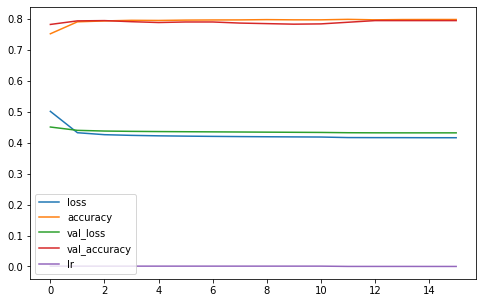

In [125]:
pd.DataFrame(history_seq.history).plot(figsize=(8, 5))
plt.show()

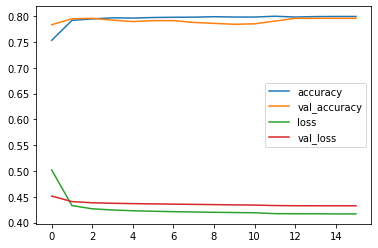

In [126]:
seq = pd.DataFrame(history_seq.history)
seq[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot()

Jika dilihat dari grafik, accuracy mulai berada di titik maksimal dan loss berada di titik minimal saat epoch ke-2

In [127]:
# Predict against Train-Set and Test-Set

y_pred_train = model_seq.predict (X_train_final)
y_pred_test_seq = model_seq.predict (X_test_final)

In [128]:
# Cara 1
# Labeling y_pred_test
y_pred_seq = []
for element in y_pred_test_seq:
  if element > 0.5:
    y_pred_seq.append(1)
  else:
    y_pred_seq.append(0)

In [129]:
# Cara 2
# Labeling y_pred_test
np.where(y_pred_test_seq > 0.5, 1, 0)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]])

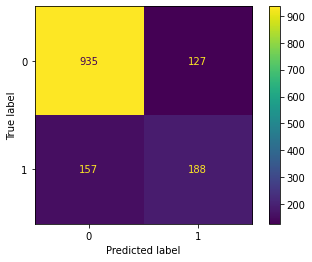

In [130]:
# Model Evaluation Using Confusion Matrix

cm_seq = confusion_matrix (y_test, y_pred_seq)
disp_seq = ConfusionMatrixDisplay (confusion_matrix = cm_seq)

disp_seq.plot()
plt.show()

Terdapat 935 data aktual 0 yang diprediksi benar dan terdapat 127 data aktual 0 yang diprediksi salah

Terdapat 188 data aktual 1 yang diprediksi benar dan terdapat 157 data aktual 1 yang diprediksi salah

In [131]:
# Cara 1
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_seq)) 

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1062
           1       0.60      0.54      0.57       345

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [132]:
# Cara 2
# Model Evaluation Using Classification Report

print (classification_report(y_test, np.where(y_pred_test_seq > 0.5, 1, 0)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1062
           1       0.60      0.54      0.57       345

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



Pada saat label positifnya = 0 terdapat 1062 data aktual dengan precision sebesar 86% dan recall sebesar 88%

Pada saat label positifnya = 1 terdapat 345 data aktual dengan precision sebesar 60% dan recall sebesar 54%

Secara keseluruhan ketepatan memprediksi data sebesar 80% jika dilihati dari accuracy

In [133]:
# Model Evaluation Using ROC-AUC

fpr_seq, tpr_seq, _ = roc_curve(y_test, y_pred_test_seq)
auc_seq = roc_auc_score(y_test, y_pred_test_seq)
auc_seq

0.8444499031087093

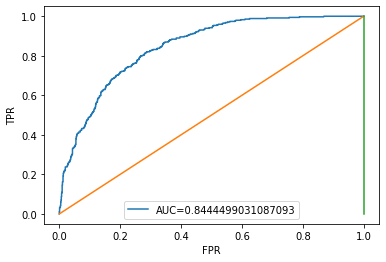

In [134]:
# Plot ROC-AUC 

plt.plot(fpr_seq, tpr_seq, label=f"AUC={auc_seq}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.84 artinya luas daerah di bawah kurva sebesar 0.84, berarti model ini termasuk ke dalam kategori good classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 84%

## Functional API

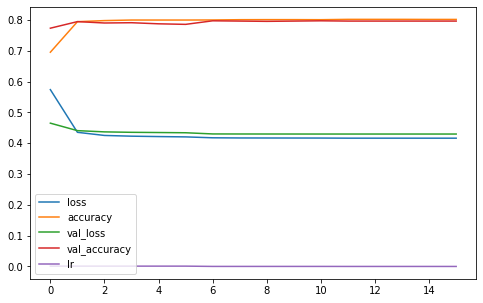

In [135]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.show()

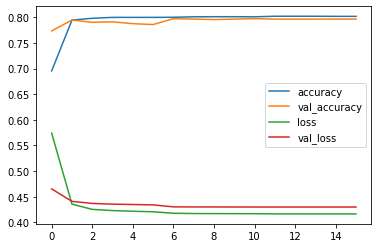

In [136]:
func = pd.DataFrame(history_func.history)
func[['accuracy', 'val_accuracy', 'loss', 'val_loss']].plot()

Jika dilihat dari grafik, accuracy mulai berada di titik maksimal dan loss berada di titik minimal saat epoch ke-2

In [137]:
# Predict against Train-Set and Test-Set

y_pred_train = model_func.predict (X_train_final)
y_pred_test_func = model_func.predict (X_test_final)

In [138]:
# Cara 1
# Labeling y_pred_test
y_pred_func = []
for element in y_pred_test_func:
  if element > 0.5:
    y_pred_func.append(1)
  else:
    y_pred_func.append(0)

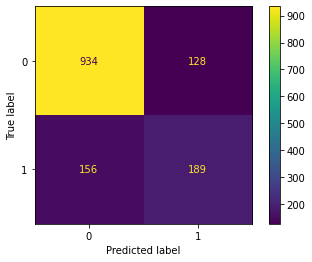

In [139]:
# Model Evaluation Using Confusion Matrix

cm_func = confusion_matrix (y_test, y_pred_func)
disp_func = ConfusionMatrixDisplay (confusion_matrix = cm_func)

disp_func.plot()
plt.show()

Terdapat 934 data aktual 0 yang diprediksi benar dan terdapat 128 data aktual 0 yang diprediksi salah

Terdapat 189 data aktual 1 yang diprediksi benar dan terdapat 156 data aktual 1 yang diprediksi salah

In [140]:
# Cara 1
# Model Evaluation Using Classification Report

print (classification_report(y_test, y_pred_func))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1062
           1       0.60      0.55      0.57       345

    accuracy                           0.80      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



Pada saat label positifnya = 0 terdapat 1062 data aktual dengan precision sebesar 86% dan recall sebesar 88%

Pada saat label positifnya = 1 terdapat 345 data aktual dengan precision sebesar 60% dan recall sebesar 55%

Secara keseluruhan ketepatan memprediksi data sebesar 80% jika dilihati dari accuracy

In [141]:
# Model Evaluation Using ROC-AUC

fpr_func, tpr_func, _ = roc_curve(y_test, y_pred_test_func)
auc_func = roc_auc_score(y_test, y_pred_test_func)
auc_func

0.8434113922323208

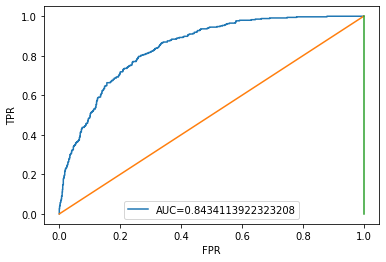

In [142]:
# Plot ROC-AUC 

plt.plot(fpr_func, tpr_func, label=f"AUC={auc_func}")
plt.plot([0,1],[0,1])
plt.plot([1,1],[0,1])
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend()

Hasil score AUC adalah 0.84 artinya luas daerah di bawah kurva sebesar 0.84, berarti model ini termasuk ke dalam kategori good classification karena memiliki kinerja membedakan antara kelas + dan kelas -  sebesar 84%

# 9 - Model Saving

> Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [86]:
# Freeze model

model_seq.trainable = False
model_func.trainable = False

In [87]:
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 993
Trainable params: 0
Non-trainable params: 993
_________________________________________________________________


In [88]:
model_func.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 29)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 40)           1200        ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 20)           820         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 49)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [89]:
# Save Model Pipeline

with open("preprocessing.pkl", "wb") as model_file:
    pickle.dump(preprocessing, model_file)

In [110]:
# # Mount google drive

# from google.colab import drive
# drive.mount('/content/drive')

# # Navigate to directory
# % /content/drive/MyDrive/tf_serving

# # Mount google drive ager saved model tersimpan ke google drive

In [90]:
# Save the entire model 

# # Jika deploy menggunakan Flask
# model_func.save('model_func.h5') 

# Jika deploy menggunakan TFServing
model_func.save('model_func') 

INFO:tensorflow:Assets written to: model_func/assets


In [91]:
# Load Model

# Jika deploy menggunakan Flask
# model_func = tf.keras.models.load_model('model_func.h5')

# Jika deploy menggunakan TFServing
model_func = tf.keras.models.load_model('model_func')

# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [92]:
# Display data_inf

data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes
3,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No
4,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No
5,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes
6,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes
7,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No
8,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.8,Yes
9,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No


In [93]:
# Split between `X` (Features) and `y` (Target)

X_inf = data_inf[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'InternetService', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'MonthlyCharges']]
y_inf = data_inf[['Churn']]

In [94]:
X_inf_final = preprocessing.transform(X_inf)

In [95]:
# Predict against Train-Set and Test-Set

y_pred_inf = model_func.predict (X_inf_final)
y_pred_inf

array([[0.79807544],
       [0.08377013],
       [0.32159492],
       [0.11181635],
       [0.02931917],
       [0.6848359 ],
       [0.02213234],
       [0.5340292 ],
       [0.35212618],
       [0.02886039]], dtype=float32)

In [96]:
# Labeling y_pred_inf
y_pred_inf_func = []
for element in y_pred_inf:
  if element > 0.5:
    y_pred_inf_func.append(1)
  else:
    y_pred_inf_func.append(0)

In [97]:
# Create Dataframe of Prediction-Set

y_pred_inf_func = pd.DataFrame(y_pred_inf_func, columns=['Prediction'])
y_pred_inf_func

,Prediction
0,1
1,0
2,0
3,0
4,0
5,1
6,0
7,1
8,0
9,0


In [98]:
# Concate Between Inference-Set And Prediction-Set

pd.concat([data_inf, y_pred_inf_func], axis=1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prediction
0,3097-NQYSN,Male,1,Yes,No,2,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Mailed check,86.85,156.35,Yes,1
1,2499-AJYUA,Female,1,Yes,No,72,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),110.80,7882.25,No,0
2,4625-EWPTF,Male,0,No,No,8,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,30.45,226.45,Yes,0
3,9555-SAHUZ,Female,0,Yes,Yes,38,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Electronic check,54.50,2076.05,No,0
4,8722-PRFDV,Female,0,Yes,Yes,71,Yes,No,DSL,Yes,No,Yes,No,Yes,Yes,Two year,No,Credit card (automatic),77.55,5574.35,No,0
5,6457-GIRWB,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,69.35,Yes,1
6,0617-AQNWT,Female,0,Yes,No,64,No,No phone service,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,47.85,3147.5,Yes,0
7,6435-SRWBJ,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,Yes,Yes,No,No,Month-to-month,Yes,Electronic check,82.75,417.75,No,1
8,1228-FZFRV,Male,0,Yes,Yes,50,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),105.95,5341.8,Yes,0
9,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No,0


In [112]:
# Get Data For api.py Model Deployment

X_valid_final.tolist ()[0]

[0.0,
 0.8024197271773763,
 -1.4728119338970869,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 2.0]

# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

1. Narasi based on EDA

Semakin tinggi tenure maka kemungkinan pelanggan yang churn akan semakin kecil

Semakin lama suatu kontrak, maka semakin rendah MonthlyCharges

Semakin lama suatu kontrak, maka semakin tinggi tenure

InternetService Fiber Optic lebih bagus daripada DSL karena harga MonthlyCharges yang lebih tinggi

Paling banyak pelanggan yang Churn dengan InternetServic Fiber Optic, mungkin ini dikarenakan InternetService Fiber Optic memiliki MonthlyCharges yang tinggi

Jika kita ingin mempunyai semua fitur dengan InternetService terbaik, maka minimal MonthlyCharges yang harus dibayarkan adalah sebesar 106.3

Jika pelanggan merupakan SeniorCitizen, rata - rata MonthlyCharges cenderung lebih tinggi

Pelanggan yang mempunyai Partner cenderung memiliki rata- rata MonthlyCharges yang lebih tinggi

Pelanggan yang mempunyai Dependents cenderung memiliki rata- rata MonthlyCharges yang lebih rendah

Jika dilihat dari grafik, dapat diketahui bahwa dataset kita Imbalance karena perbandingan data yang No >2.5x dari data Yes dengan perbandingan 73% : 27%

2. Narasi based on Model Evaluation

Dari 2 model yang ada, semua model termasuk ke dalam kategori good classification karena memiliki akurasi dalam membedakan antara kelas + dan kelas - lebih besar dari 80%

3. Narasi based on Mode

Dari ke - 2 model yang dipakai tidak ada model yang yang jelek karena semua model memiliki akurasi di atas 80% berdasarkan AUC Score

Model Artifical Neural Network dengan menggunakan Functional API sedikit lebih baik karena accuracy saat training sedikit lebih besar dengan waktu training yang lebih cepat 

4. Further Improvement

Karena datanya tabular dan tidak banyak sebaiknya digunakan Machine Learning, jika menggunakan deep learning bisa dilakukan penambahan layer ataupun neuron, bisa juga dengan menambahkan parameter lain seperti threshold, weight initializer, menggunakan smote agar data kita menjadi balance, dll